In [5]:
import  pymysql

connection=pymysql.connect(host="localhost",
                         user="root",
                         password="",)

try:
    with connection.cursor() as cursor:
        cursor.execute("create database if not exists sales_data")
        print("database created successfully (or already exists).")
finally:
    connection.close()

database created successfully (or already exists).


In [7]:
connection=pymysql.connect(
    host="localhost",
    user="root",
    password="",
    database="sales_data")

cursor=connection.cursor()

create_table_query="""

CREATE TABLE sales (
    id INT AUTO_INCREMENT PRIMARY KEY,
    product VARCHAR(100),
    quantity INT,
    price FLOAT
)
"""

cursor.execute(create_table_query)
print("Table created successfully")

Table created successfully


In [11]:
connection = pymysql.connect(
        host='localhost',
        user='root',
        port=3306,
        database='sales_data'
    )
cursor = connection.cursor()
insert_data_query = """

INSERT INTO sales (product, quantity, price) VALUES
('Milk', 10, 45),
('Bread', 15, 35),
('Eggs', 12, 6),
('Rice', 5, 70),
('Sugar', 7, 40),
('Salt', 8, 20),
('Tea', 4, 120),
('Coffee', 3, 150),
('Butter', 6, 55),
('Cheese', 4, 80),
('Tomato', 10, 30),
('Onion', 12, 25),
('Potato', 20, 22),
('Carrot', 9, 28),
('Apple', 6, 60),
('Banana', 10, 35),
('Grapes', 4, 85),
('Mango', 3, 90),
('Oil', 5, 130),
('Wheat Flour', 8, 45),
('Toor Dal', 6, 95),
('Chana Dal', 7, 85),
('Green Peas', 5, 75),
('Biscuits', 9, 20),
('Chocolates', 12, 25),
('Soap', 10, 30),
('Shampoo', 4, 110),
('Toothpaste', 6, 55)

"""
cursor.execute(insert_data_query)
connection.commit()
print("Data inserted successfully into students table.")

Data inserted successfully into students table.


In [17]:
connection = pymysql.connect(
        host='localhost',
        user='root',
        port=3306,
        database='sales_data'
    )
cursor = connection.cursor()

query = """
SELECT 
  product,
  SUM(quantity) AS total_quantity,
  ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY product
ORDER BY ROUND(SUM(quantity * price), 2) DESC
"""

cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Oil', Decimal('5'), 650.0)
('Chana Dal', Decimal('7'), 595.0)
('Toor Dal', Decimal('6'), 570.0)
('Bread', Decimal('15'), 525.0)
('Tea', Decimal('4'), 480.0)
('Milk', Decimal('10'), 450.0)
('Coffee', Decimal('3'), 450.0)
('Potato', Decimal('20'), 440.0)
('Shampoo', Decimal('4'), 440.0)
('Green Peas', Decimal('5'), 375.0)
('Wheat Flour', Decimal('8'), 360.0)
('Apple', Decimal('6'), 360.0)
('Banana', Decimal('10'), 350.0)
('Rice', Decimal('5'), 350.0)
('Grapes', Decimal('4'), 340.0)
('Toothpaste', Decimal('6'), 330.0)
('Butter', Decimal('6'), 330.0)
('Cheese', Decimal('4'), 320.0)
('Onion', Decimal('12'), 300.0)
('Soap', Decimal('10'), 300.0)
('Tomato', Decimal('10'), 300.0)
('Chocolates', Decimal('12'), 300.0)
('Sugar', Decimal('7'), 280.0)
('Mango', Decimal('3'), 270.0)
('Carrot', Decimal('9'), 252.0)
('Biscuits', Decimal('9'), 180.0)
('Salt', Decimal('8'), 160.0)
('Eggs', Decimal('12'), 72.0)



 Grocery Sales Summary:

        product  total_quantity  total_revenue
0           Oil             5.0          650.0
1     Chana Dal             7.0          595.0
2      Toor Dal             6.0          570.0
3         Bread            15.0          525.0
4           Tea             4.0          480.0
5        Coffee             3.0          450.0
6          Milk            10.0          450.0
7        Potato            20.0          440.0
8       Shampoo             4.0          440.0
9    Green Peas             5.0          375.0
10  Wheat Flour             8.0          360.0
11        Apple             6.0          360.0
12         Rice             5.0          350.0
13       Banana            10.0          350.0
14       Grapes             4.0          340.0
15       Butter             6.0          330.0
16   Toothpaste             6.0          330.0
17       Cheese             4.0          320.0
18         Soap            10.0          300.0
19   Chocolates            12.0   

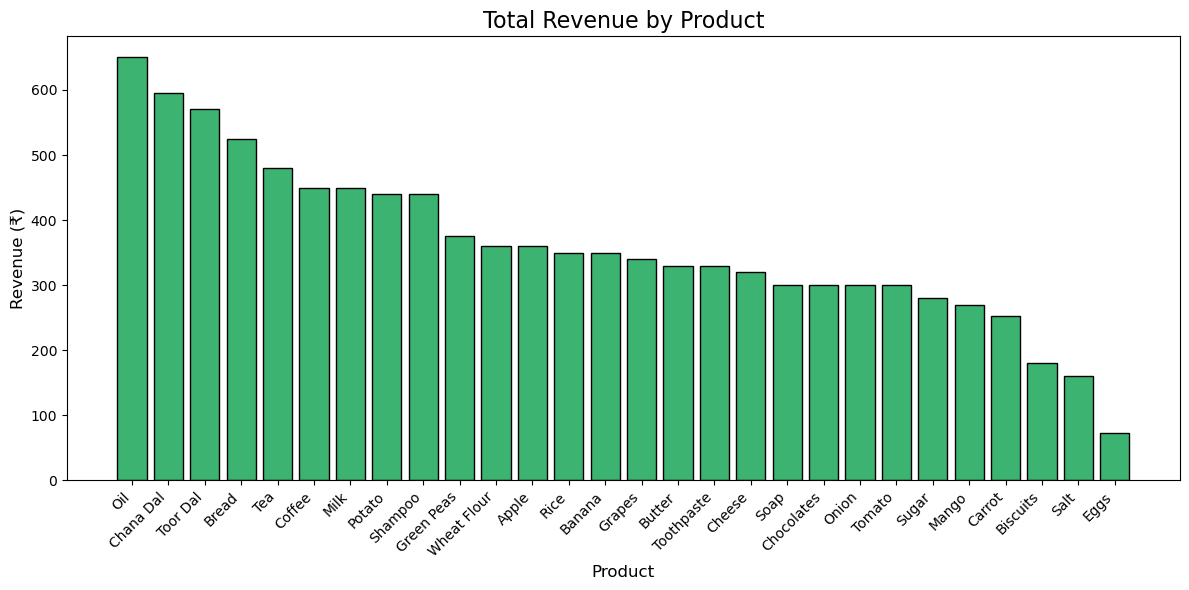

In [40]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Create SQLAlchemy engine using PyMySQL
engine = create_engine("mysql+pymysql://root:@localhost:3306/sales_data")

# SQL Query
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

# Load data using pandas
df = pd.read_sql_query(query, engine)

# Show results
print("\n Grocery Sales Summary:\n")
print(df)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df['product'], df['total_revenue'], color='mediumseagreen', edgecolor='black')
plt.title("Total Revenue by Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


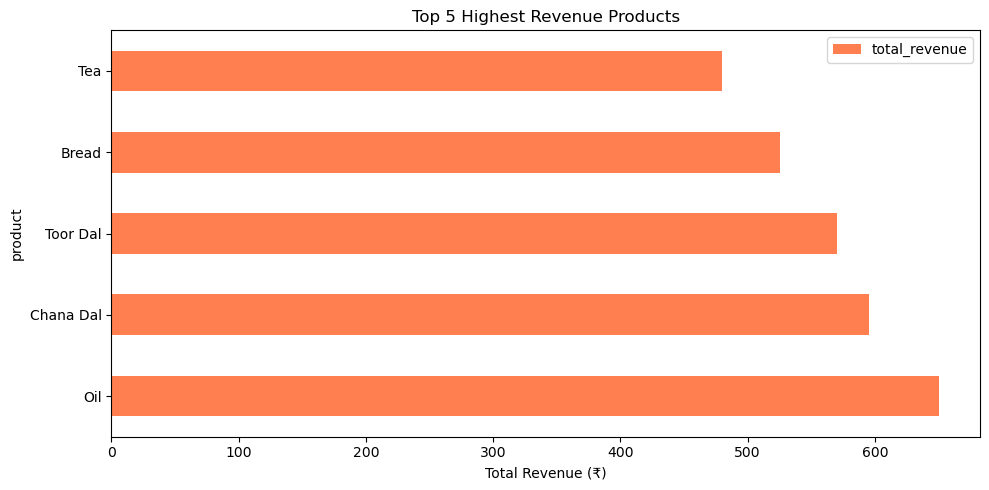

In [42]:
top5 = df.nlargest(5, 'total_revenue')

top5.plot(
    kind='barh',
    x='product',
    y='total_revenue',
    color='coral',
    figsize=(10, 5)
)

plt.title("Top 5 Highest Revenue Products")
plt.xlabel("Total Revenue (₹)")
plt.tight_layout()
plt.savefig("top5_products.png")
plt.show()

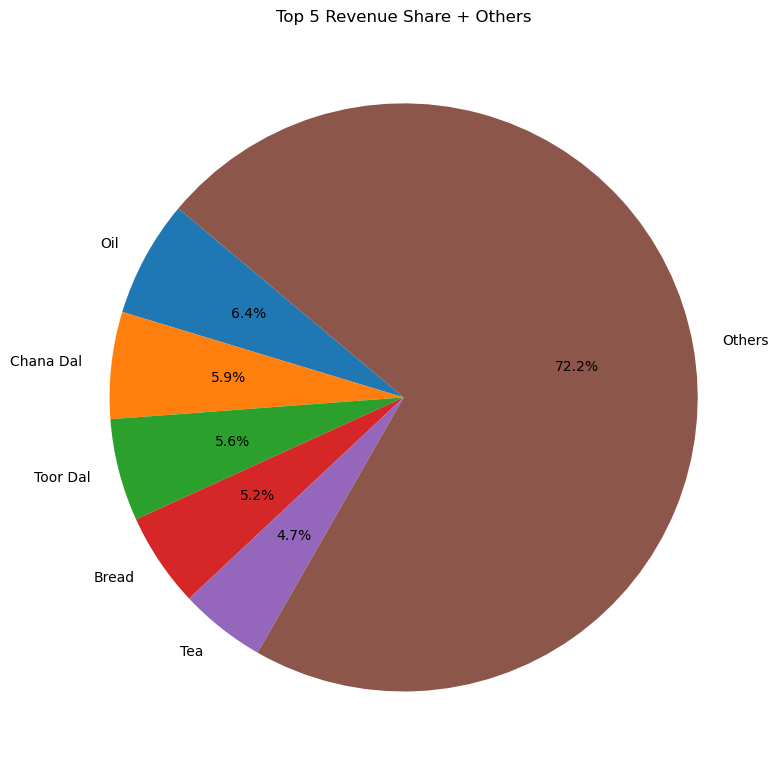

In [50]:
top5 = df.nlargest(5, 'total_revenue')
others_sum = df['total_revenue'].sum() - top5['total_revenue'].sum()

labels = list(top5['product']) + ['Others']
sizes = list(top5['total_revenue']) + [others_sum]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Revenue Share + Others")
plt.tight_layout()
plt.savefig("top5_pie_chart.png")
plt.show()

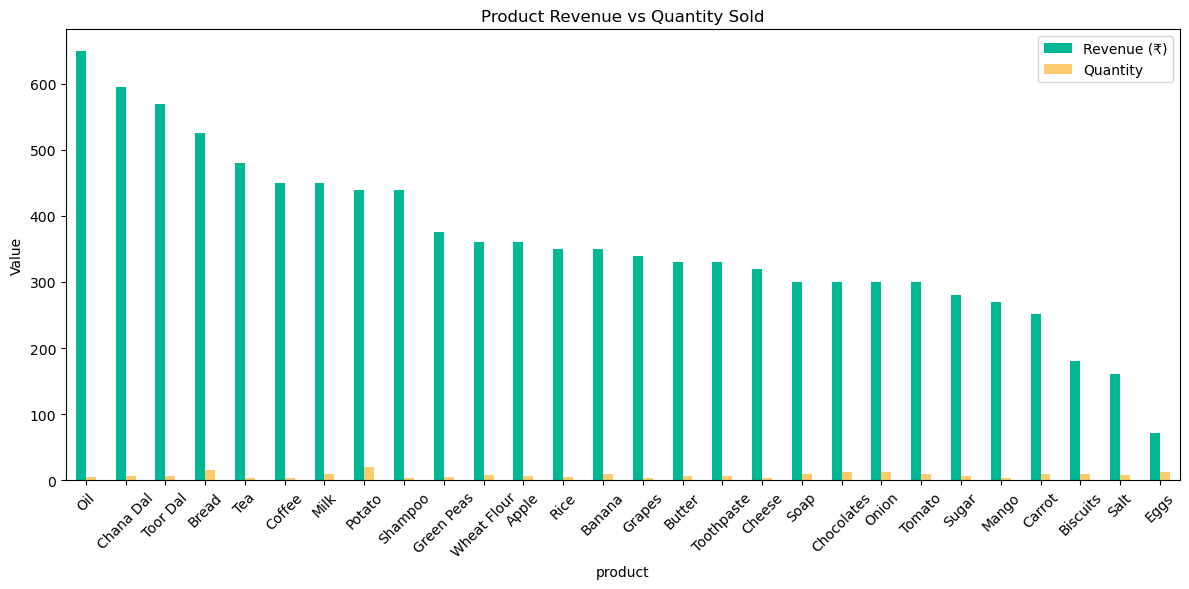

In [46]:
df_sorted = df.sort_values("total_revenue", ascending=False)

df_sorted.plot(
    x='product',
    y=['total_revenue', 'total_quantity'],
    kind='bar',
    figsize=(12, 6),
    color=['#00b894', '#fdcb6e']
)

plt.title("Product Revenue vs Quantity Sold")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(["Revenue (₹)", "Quantity"])
plt.tight_layout()
plt.savefig("revenue_vs_quantity.png")
plt.show()